In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.tseries.offsets import DateOffset
import statsmodels.formula.api as smf
from sklearn import model_selection

In [2]:
df = pd.read_csv('dengue_features_train.csv')
df1 = pd.read_csv('dengue_labels_train.csv')

In [3]:
df_copy = df.copy()
df1_copy = df1.copy()

In [4]:
merged_df = pd.merge(df_copy, df1_copy)

In [5]:
pd.set_option('display.max_columns', 25)
merged_df.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0  0.177617                 12.42             297.572857   
1  0.155486                 22.82             298.211429   
2  0.170843                 34.54             298.781429   
3  0.235886                 15.36             298.987143   
4  0.247340                  7.52             299.518571   

   reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0             297.742857                   292.414286   
1             298.442857                   293.951429   
2             298.878571                   295.434286   
3             299.228571                   295.310000   
4             299.664286                   295.821429   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      299.8                      295.9   
1                      300.9                      296.4   
2                      300.5                      297.3   
3                      301.4                      297.0   
4                      301.9                      297.5   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  total_cases  
0                29.4                20.0               16.0            4  
1                31.7                22.2                8.6            5  
2                32.2                22.8               41.4            4  
3                33.3                23.3                4.0            3  
4                35.0                23.9                5.8            6

In [6]:
merged_df['week_start_date'] = pd.to_datetime(merged_df['week_start_date'])

<AxesSubplot:ylabel='Frequency'>

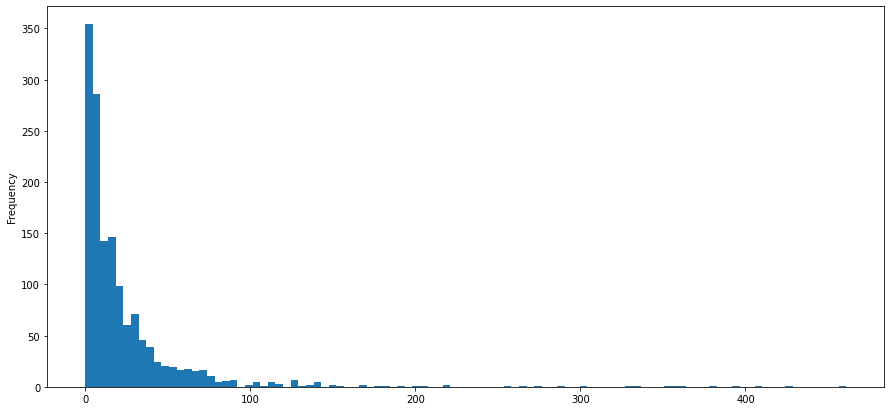

In [7]:
merged_df['total_cases'].plot(kind='hist', bins=100, figsize=(15, 7))

In [8]:
missing_percent = (merged_df.isnull().sum())/(merged_df.shape[0]) * 100
missing_percent

city                                      0.000000
year                                      0.000000
weekofyear                                0.000000
week_start_date                           0.000000
ndvi_ne                                  13.324176
ndvi_nw                                   3.571429
ndvi_se                                   1.510989
ndvi_sw                                   1.510989
precipitation_amt_mm                      0.892857
reanalysis_air_temp_k                     0.686813
reanalysis_avg_temp_k                     0.686813
reanalysis_dew_point_temp_k               0.686813
reanalysis_max_air_temp_k                 0.686813
reanalysis_min_air_temp_k                 0.686813
reanalysis_precip_amt_kg_per_m2           0.686813
reanalysis_relative_humidity_percent      0.686813
reanalysis_sat_precip_amt_mm              0.892857
reanalysis_specific_humidity_g_per_kg     0.686813
reanalysis_tdtr_k                         0.686813
station_avg_temp_c             

In [9]:
precip_analysis = merged_df.groupby('year').agg(reanalysis_precip_amt_kg_per_m2=('reanalysis_precip_amt_kg_per_m2', np.mean),
                                                precipitation_amt_mm=('precipitation_amt_mm', np.mean),
                                                reanalysis_sat_precip_amt_mm=('reanalysis_sat_precip_amt_mm', np.mean),
                                                station_precip_mm=('station_precip_mm', np.mean),
                                                total_cases=('total_cases', np.mean))

In [10]:
precip_analysis

reanalysis_precip_amt_kg_per_m2  precipitation_amt_mm  \
year                                                          
1990                        42.889143             43.246571   
1991                        28.058077             24.566538   
1992                        45.969020             44.930000   
1993                        42.262745             30.428824   
1994                        22.738462             19.841154   
1995                        31.586731             35.348462   
1996                        39.705000             35.662115   
1997                        26.676346             24.377115   
1998                        45.650196             45.543725   
1999                        34.317843             44.759020   
2000                        19.109231             37.426538   
2001                        43.933365             50.513462   
2002                        33.915288             43.870865   
2003                        47.092308             56.411538   
2004                        38.830980             52.093725   
2005                        39.290980             51.466373   
2006                        37.634135             56.837596   
2007                        42.422981             51.516923   
2008                        52.655217             49.461449   
2009                        64.810196             70.310980   
2010                       101.086800             60.102400   

      reanalysis_sat_precip_amt_mm  station_precip_mm  total_cases  
year                                                                
1990                     43.246571          25.477143    24.742857  
1991                     24.566538          17.363462    53.865385  
1992                     44.930000          26.431373    45.596154  
1993                     30.428824          22.605882    22.230769  
1994                     19.841154          19.755769   125.634615  
1995                     35.348462          27.755769    25.634615  
1996                     35.662115          32.826923    16.442308  
1997                     24.377115          19.882692    27.961538  
1998                     45.543725          35.172549    88.365385  
1999                     44.759020          29.672549    31.403846  
2000                     37.426538          25.615584     6.358974  
2001                     50.513462          38.279612    14.201923  
2002                     43.870865          39.502913    11.115385  
2003                     56.411538          53.959615    10.221154  
2004                     52.093725          52.118627    12.000000  
2005                     51.466373          57.188119    20.346154  
2006                     56.837596          55.546078     9.480769  
2007                     51.516923          55.293204    22.442308  
2008                     49.461449          43.032353    13.144928  
2009                     70.310980          38.524490     6.230769  
2010                     60.102400          31.182609     8.576923

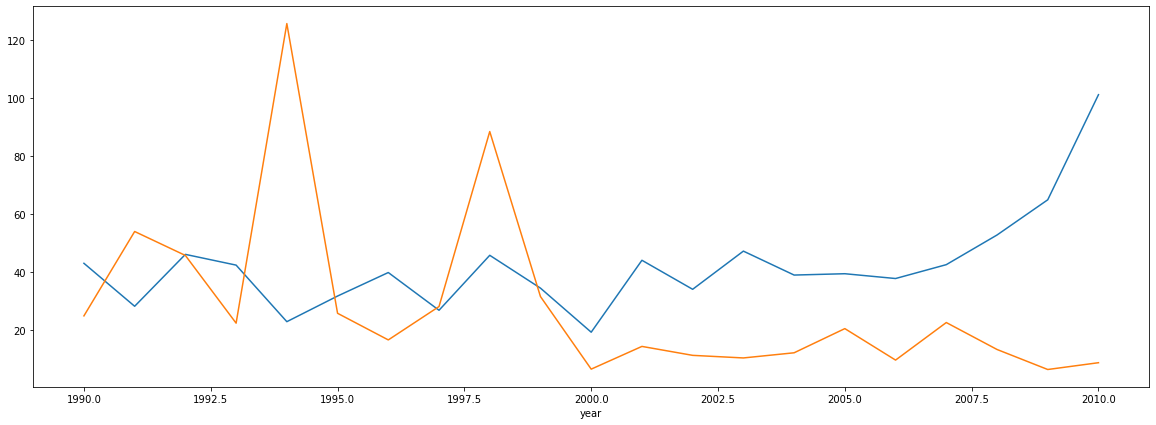

In [11]:
plt.figure(figsize=(20, 7))
precip_analysis['reanalysis_precip_amt_kg_per_m2'].plot()
precip_analysis['total_cases'].plot()
plt.show()

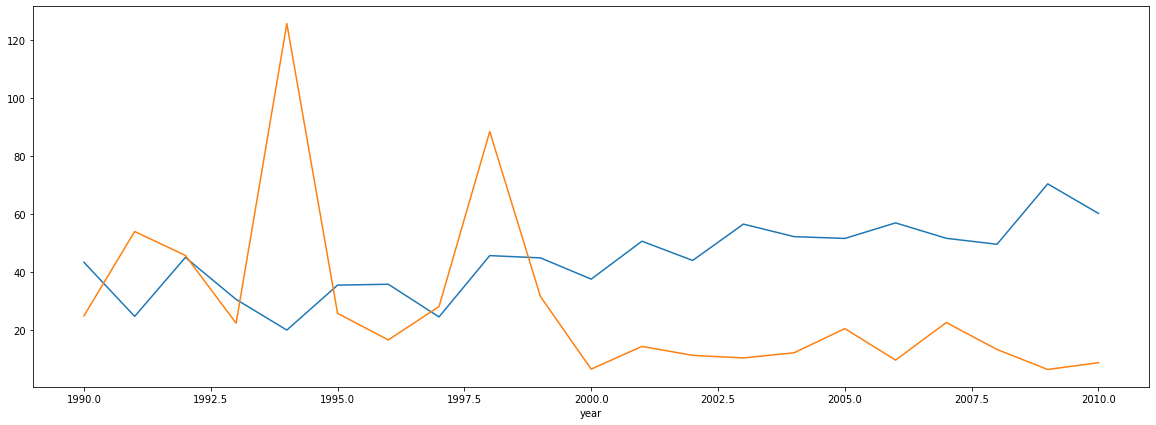

In [12]:
plt.figure(figsize=(20, 7))
precip_analysis['reanalysis_sat_precip_amt_mm'].plot()
precip_analysis['total_cases'].plot()
plt.show()

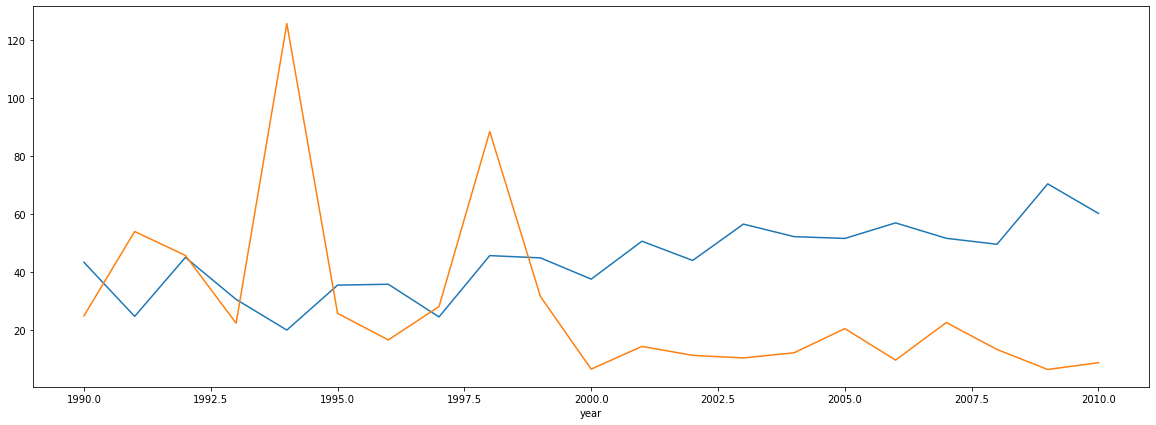

In [13]:
plt.figure(figsize=(20, 7))
precip_analysis['precipitation_amt_mm'].plot()
precip_analysis['total_cases'].plot()
plt.show()

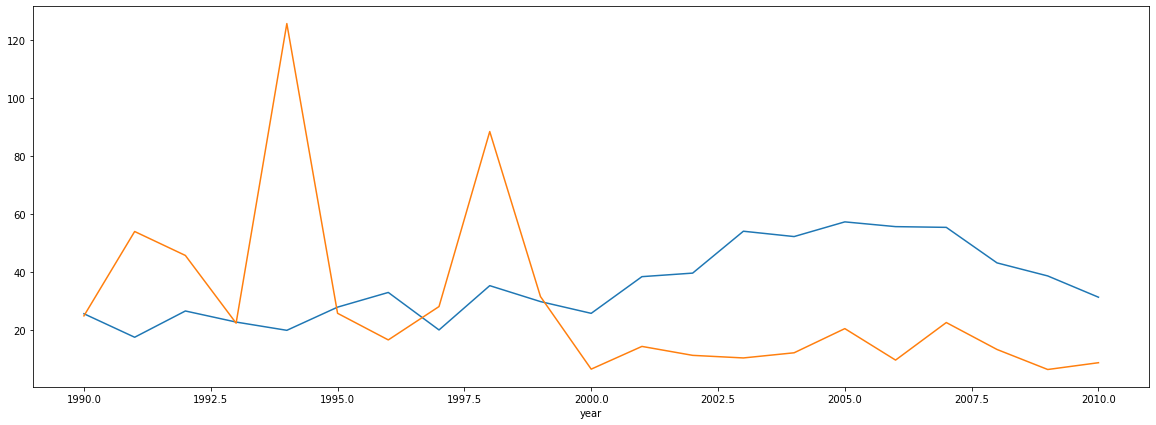

In [14]:
plt.figure(figsize=(20, 7))
precip_analysis['station_precip_mm'].plot()
precip_analysis['total_cases'].plot()
plt.show()

In [15]:
px.scatter(precip_analysis, x='precipitation_amt_mm', y='total_cases', trendline='ols')

In [16]:
precip_resample_analysis = merged_df.set_index('week_start_date')
precip_resample_analysis = precip_resample_analysis[['reanalysis_precip_amt_kg_per_m2', 'precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm', 'station_precip_mm', 'total_cases']]

In [17]:
precip_resample_analysis.head()

reanalysis_precip_amt_kg_per_m2  precipitation_amt_mm  \
week_start_date                                                          
1990-04-30                                 32.00                 12.42   
1990-05-07                                 17.94                 22.82   
1990-05-14                                 26.10                 34.54   
1990-05-21                                 13.90                 15.36   
1990-05-28                                 12.20                  7.52   

                 reanalysis_sat_precip_amt_mm  station_precip_mm  total_cases  
week_start_date                                                                
1990-04-30                              12.42               16.0            4  
1990-05-07                              22.82                8.6            5  
1990-05-14                              34.54               41.4            4  
1990-05-21                              15.36                4.0            3  
1990-05-28                               7.52                5.8            6

In [18]:
precip_resample_analysis.index

DatetimeIndex(['1990-04-30', '1990-05-07', '1990-05-14', '1990-05-21',
               '1990-05-28', '1990-06-04', '1990-06-11', '1990-06-18',
               '1990-06-25', '1990-07-02',
               ...
               '2010-04-23', '2010-04-30', '2010-05-07', '2010-05-14',
               '2010-05-21', '2010-05-28', '2010-06-04', '2010-06-11',
               '2010-06-18', '2010-06-25'],
              dtype='datetime64[ns]', name='week_start_date', length=1456, freq=None)

In [19]:
precip_offset_frame_prev = precip_resample_analysis.copy()
precip_offset_frame_prev.index -= DateOffset(years=1)

In [20]:
precip_offset_frame_prev

reanalysis_precip_amt_kg_per_m2  precipitation_amt_mm  \
week_start_date                                                          
1989-04-30                                 32.00                 12.42   
1989-05-07                                 17.94                 22.82   
1989-05-14                                 26.10                 34.54   
1989-05-21                                 13.90                 15.36   
1989-05-28                                 12.20                  7.52   
...                                          ...                   ...   
2009-05-28                                 45.00                 55.30   
2009-06-04                                207.10                 86.47   
2009-06-11                                 50.60                 58.94   
2009-06-18                                 62.33                 59.67   
2009-06-25                                 36.90                 63.22   

                 reanalysis_sat_precip_amt_mm  station_precip_mm  total_cases  
week_start_date                                                                
1989-04-30                              12.42               16.0            4  
1989-05-07                              22.82                8.6            5  
1989-05-14                              34.54               41.4            4  
1989-05-21                              15.36                4.0            3  
1989-05-28                               7.52                5.8            6  
...                                       ...                ...          ...  
2009-05-28                              55.30               27.0            5  
2009-06-04                              86.47               36.6            8  
2009-06-11                              58.94                7.4            1  
2009-06-18                              59.67               16.0            1  
2009-06-25                              63.22               20.4            4  

[1456 rows x 5 columns]

In [21]:
precip_offset_frame_fore = precip_resample_analysis.copy()
precip_offset_frame_fore.index += DateOffset(years=1)

In [22]:
precip_offset_frame_fore

reanalysis_precip_amt_kg_per_m2  precipitation_amt_mm  \
week_start_date                                                          
1991-04-30                                 32.00                 12.42   
1991-05-07                                 17.94                 22.82   
1991-05-14                                 26.10                 34.54   
1991-05-21                                 13.90                 15.36   
1991-05-28                                 12.20                  7.52   
...                                          ...                   ...   
2011-05-28                                 45.00                 55.30   
2011-06-04                                207.10                 86.47   
2011-06-11                                 50.60                 58.94   
2011-06-18                                 62.33                 59.67   
2011-06-25                                 36.90                 63.22   

                 reanalysis_sat_precip_amt_mm  station_precip_mm  total_cases  
week_start_date                                                                
1991-04-30                              12.42               16.0            4  
1991-05-07                              22.82                8.6            5  
1991-05-14                              34.54               41.4            4  
1991-05-21                              15.36                4.0            3  
1991-05-28                               7.52                5.8            6  
...                                       ...                ...          ...  
2011-05-28                              55.30               27.0            5  
2011-06-04                              86.47               36.6            8  
2011-06-11                              58.94                7.4            1  
2011-06-18                              59.67               16.0            1  
2011-06-25                              63.22               20.4            4  

[1456 rows x 5 columns]

In [23]:
precip_offset_frame_weekB = precip_resample_analysis.copy()
precip_offset_frame_weekB.index -= DateOffset(weeks=4)

In [24]:
precip_offset_frame_weekF = precip_resample_analysis.copy()
precip_offset_frame_weekF.index -= DateOffset(weeks=4)

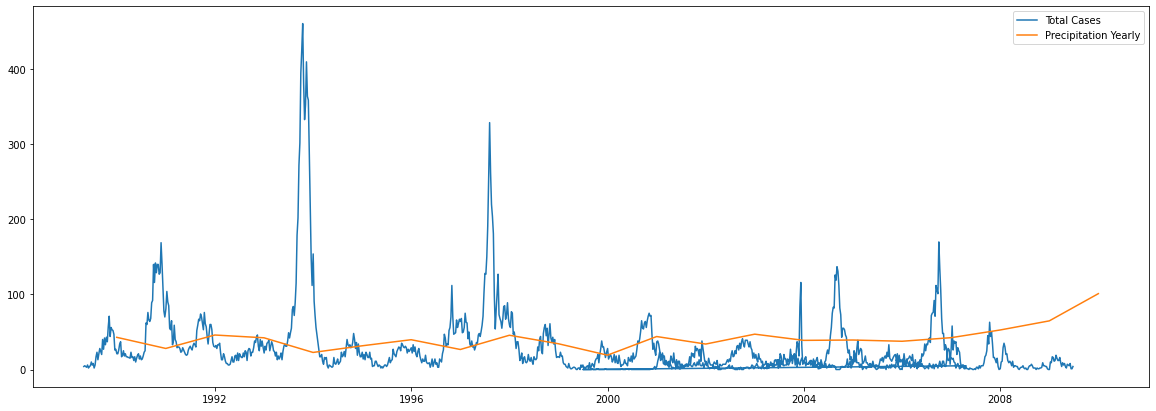

In [25]:
plt.figure(figsize=(20, 7))
plt.plot(precip_offset_frame_prev['total_cases'], label='Total Cases')
plt.plot(precip_offset_frame_prev['reanalysis_precip_amt_kg_per_m2'].resample('1Y').mean(), label='Precipitation Yearly')
plt.legend()
plt.show()

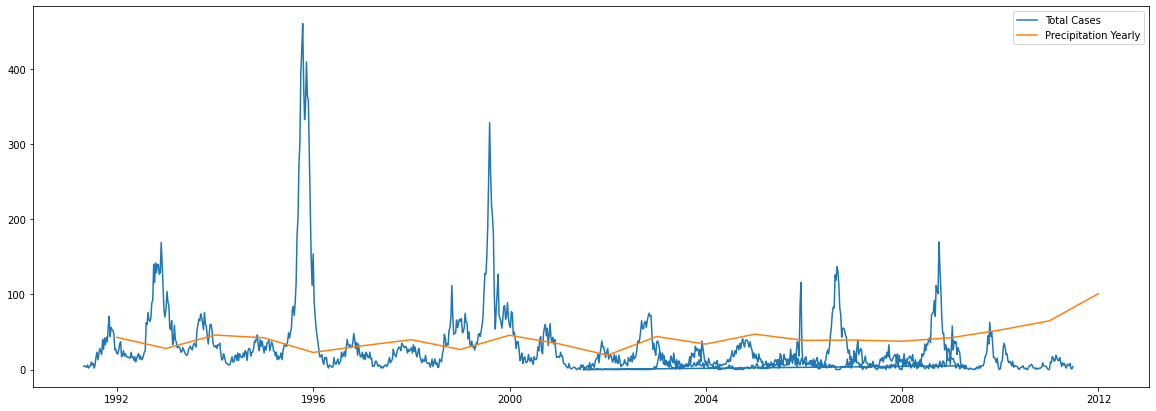

In [26]:
plt.figure(figsize=(20, 7))
plt.plot(precip_offset_frame_fore['total_cases'], label='Total Cases')
plt.plot(precip_offset_frame_fore['reanalysis_precip_amt_kg_per_m2'].resample('1Y').mean(), label='Precipitation Yearly')
plt.legend()
plt.show()

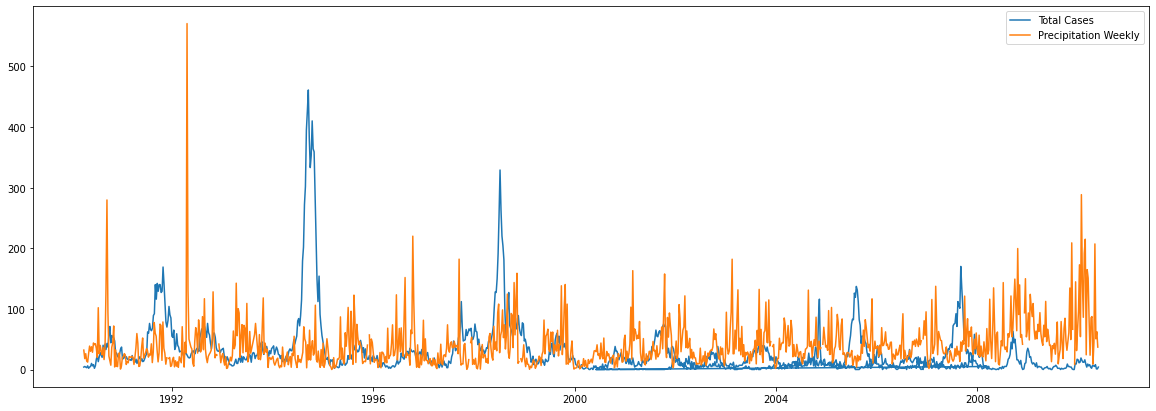

In [27]:
plt.figure(figsize=(20, 7))
plt.plot(precip_offset_frame_weekB['total_cases'], label='Total Cases')
plt.plot(precip_offset_frame_weekB['reanalysis_precip_amt_kg_per_m2'].resample('7D').mean(), label='Precipitation Weekly')
plt.legend()
plt.show()

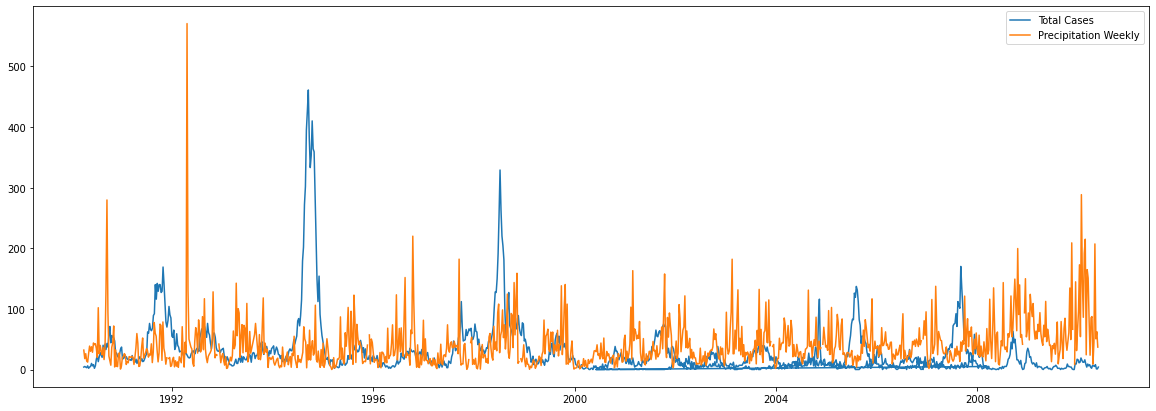

In [28]:
plt.figure(figsize=(20, 7))
plt.plot(precip_offset_frame_weekF['total_cases'], label='Total Cases')
plt.plot(precip_offset_frame_weekF['reanalysis_precip_amt_kg_per_m2'].resample('7D').mean(), label='Precipitation Weekly')
plt.legend()
plt.show()

In [29]:
precip_lag = precip_resample_analysis.copy()

In [30]:
precip_lag['reanalysis_precip_amt_kg_per_m2_t-7'] = precip_lag['reanalysis_precip_amt_kg_per_m2'].shift(-7)
precip_lag['reanalysis_precip_amt_kg_per_m2_t-30'] = precip_lag['reanalysis_precip_amt_kg_per_m2'].shift(-30)
precip_lag['reanalysis_precip_amt_kg_per_m2_t-365'] = precip_lag['reanalysis_precip_amt_kg_per_m2'].shift(-365)

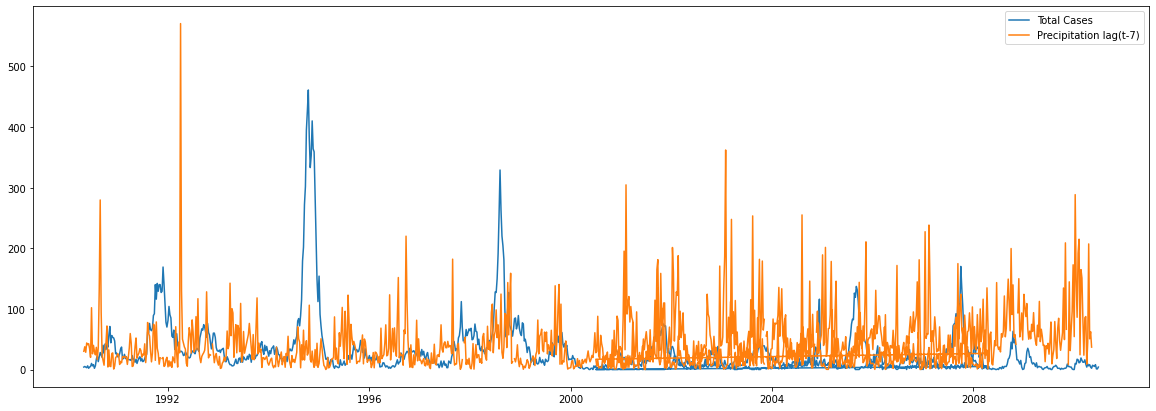

In [31]:
plt.figure(figsize=(20, 7))
plt.plot(precip_lag['total_cases'], label='Total Cases')
plt.plot(precip_lag['reanalysis_precip_amt_kg_per_m2_t-7'], label='Precipitation lag(t-7)')
plt.legend()
plt.show()

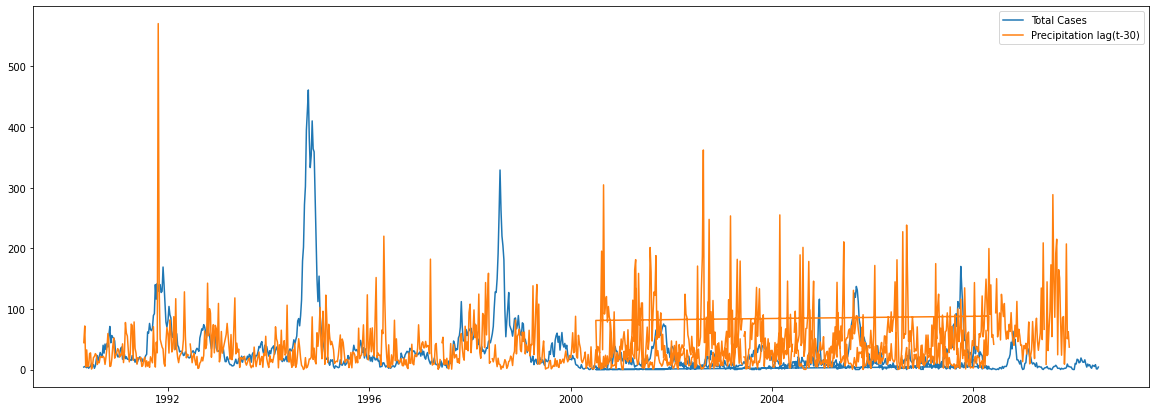

In [32]:
plt.figure(figsize=(20, 7))
plt.plot(precip_lag['total_cases'], label='Total Cases')
plt.plot(precip_lag['reanalysis_precip_amt_kg_per_m2_t-30'], label='Precipitation lag(t-30)')
plt.legend()
plt.show()

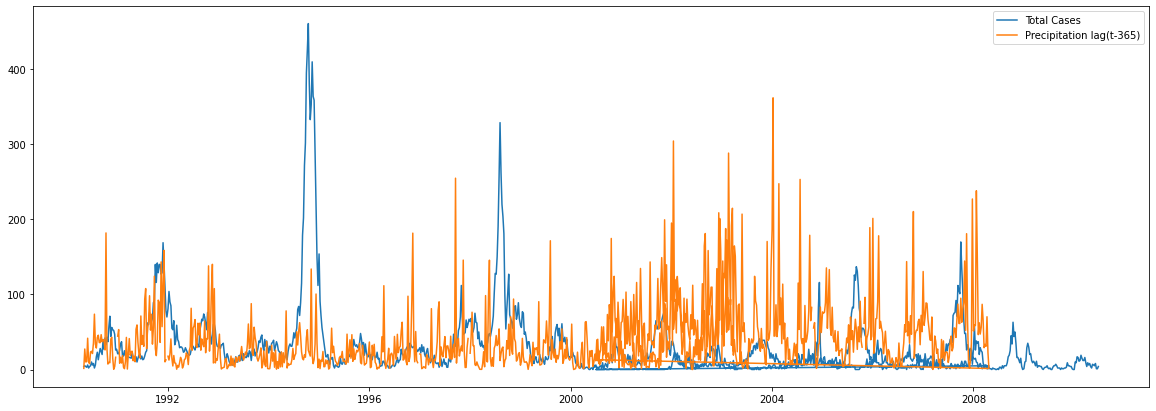

In [33]:
plt.figure(figsize=(20, 7))
plt.plot(precip_lag['total_cases'], label='Total Cases')
plt.plot(precip_lag['reanalysis_precip_amt_kg_per_m2_t-365'], label='Precipitation lag(t-365)')
plt.legend()
plt.show()

In [34]:
px.scatter(precip_lag, x='reanalysis_precip_amt_kg_per_m2_t-7', y='total_cases', trendline='ols')

In [35]:
px.scatter(precip_offset_frame_weekF, x='reanalysis_precip_amt_kg_per_m2', y='total_cases', trendline='ols')

In [36]:
px.scatter(precip_offset_frame_weekB, x='reanalysis_precip_amt_kg_per_m2', y='total_cases', trendline='ols')

In [37]:
px.scatter(precip_offset_frame_prev, x='reanalysis_precip_amt_kg_per_m2', y='total_cases', trendline='ols')

In [38]:
px.scatter(precip_offset_frame_fore, x='reanalysis_precip_amt_kg_per_m2', y='total_cases', trendline='ols')

<AxesSubplot:ylabel='Frequency'>

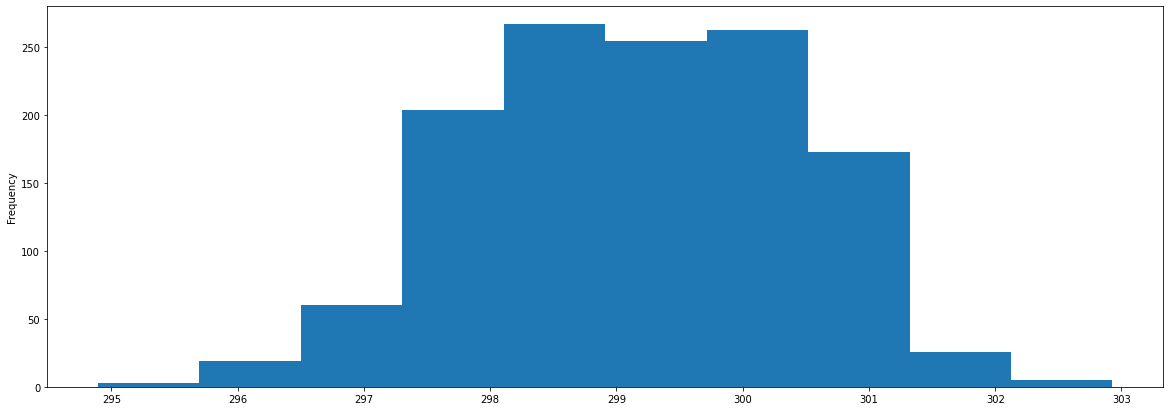

In [39]:
merged_df.loc[(merged_df['total_cases']<50), 'reanalysis_avg_temp_k'].plot(kind='hist', figsize=(20, 7))

<AxesSubplot:ylabel='Frequency'>

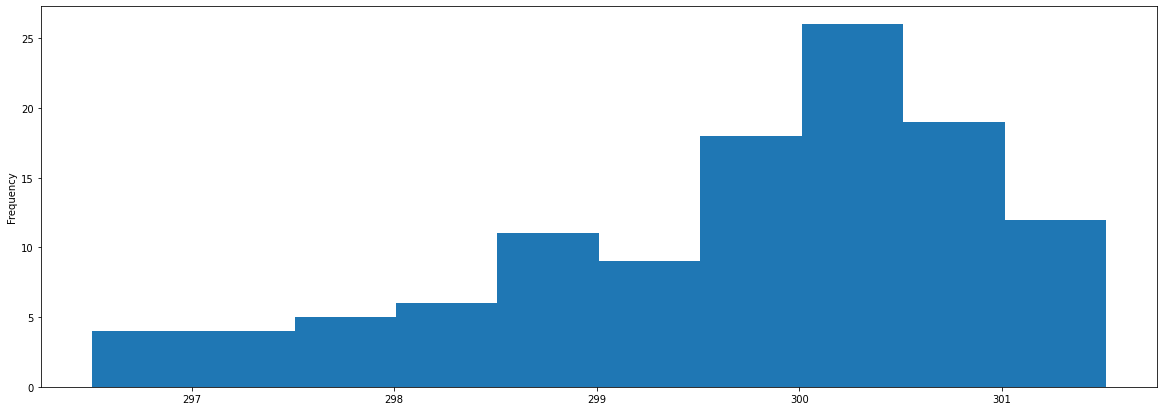

In [40]:
merged_df.loc[(merged_df['total_cases']>=50)&(merged_df['total_cases']<=100), 'reanalysis_avg_temp_k'].plot(kind='hist', figsize=(20, 7))

<AxesSubplot:ylabel='Frequency'>

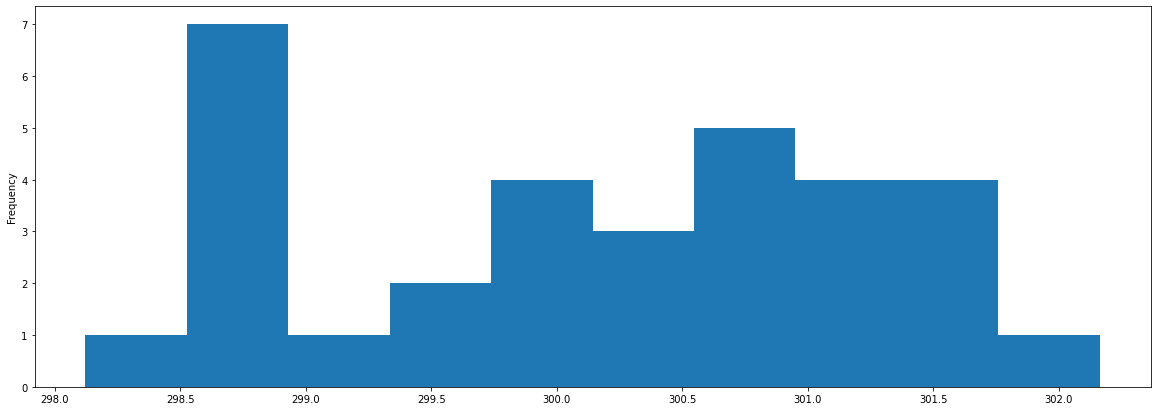

In [41]:
merged_df.loc[(merged_df['total_cases']>=100)&(merged_df['total_cases']<=150), 'reanalysis_avg_temp_k'].plot(kind='hist', figsize=(20, 7))

<AxesSubplot:ylabel='Frequency'>

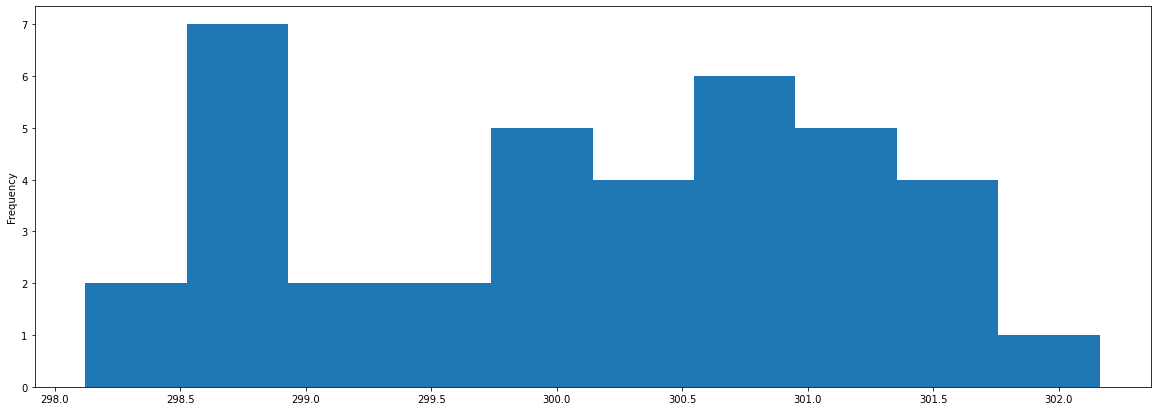

In [42]:
merged_df.loc[(merged_df['total_cases']>=100)&(merged_df['total_cases']<=200), 'reanalysis_avg_temp_k'].plot(kind='hist', figsize=(20, 7))

<AxesSubplot:ylabel='Frequency'>

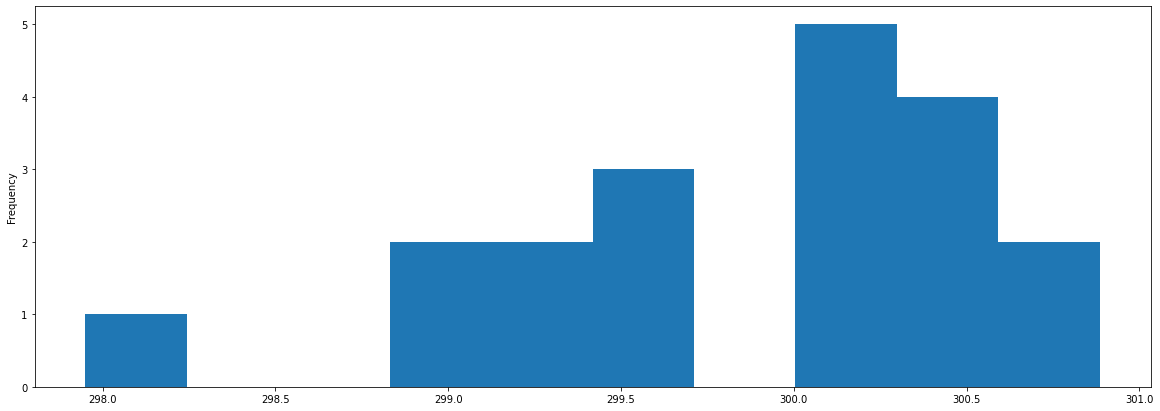

In [43]:
merged_df.loc[(merged_df['total_cases']>=200), 'reanalysis_avg_temp_k'].plot(kind='hist', figsize=(20, 7))

In [44]:
merged_df.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0  0.177617                 12.42             297.572857   
1  0.155486                 22.82             298.211429   
2  0.170843                 34.54             298.781429   
3  0.235886                 15.36             298.987143   
4  0.247340                  7.52             299.518571   

   reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0             297.742857                   292.414286   
1             298.442857                   293.951429   
2             298.878571                   295.434286   
3             299.228571                   295.310000   
4             299.664286                   295.821429   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      299.8                      295.9   
1                      300.9                      296.4   
2                      300.5                      297.3   
3                      301.4                      297.0   
4                      301.9                      297.5   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  total_cases  
0                29.4                20.0               16.0            4  
1                31.7                22.2                8.6            5  
2                32.2                22.8               41.4            4  
3                33.3                23.3                4.0            3  
4                35.0                23.9                5.8            6

In [45]:
temperature_analysis = merged_df.groupby('year').agg(reanalysis_air_temp_k=('reanalysis_air_temp_k', np.mean),
                                                reanalysis_avg_temp_k=('reanalysis_avg_temp_k', np.mean),
                                                reanalysis_max_air_temp_k=('reanalysis_max_air_temp_k', np.mean),
                                                reanalysis_min_air_temp_k=('reanalysis_min_air_temp_k', np.mean),
                                                station_avg_temp_c=('station_avg_temp_c', np.mean),
                                                station_diur_temp_rng_c=('station_diur_temp_rng_c', np.mean),
                                                station_max_temp_c=('station_max_temp_c', np.mean),
                                                station_min_temp_c=('station_min_temp_c', np.mean),
                                                total_cases=('total_cases', np.mean))

In [46]:
temperature_analysis

reanalysis_air_temp_k  reanalysis_avg_temp_k  reanalysis_max_air_temp_k  \
year                                                                            
1990             299.478204             299.572041                 301.705714   
1991             298.769258             298.899863                 301.034615   
1992             298.737255             298.870448                 301.037255   
1993             298.721877             298.817647                 300.960784   
1994             298.889588             299.015797                 301.044231   
1995             298.975495             299.091896                 301.303846   
1996             298.572582             298.686401                 300.757692   
1997             299.098104             299.225962                 301.334615   
1998             299.425126             299.528711                 301.745098   
1999             299.071429             299.154762                 301.264706   
2000             298.819469             299.363828                 303.885897   
2001             298.471374             299.150549                 304.575000   
2002             298.571676             299.219505                 304.260577   
2003             298.608338             299.296429                 304.389423   
2004             298.531695             299.246779                 304.109804   
2005             298.983824             299.652731                 304.739216   
2006             298.834121             299.563874                 304.479808   
2007             298.807239             299.515591                 304.425962   
2008             297.655155             298.586542                 304.739130   
2009             297.794230             298.996218                 306.582353   
2010             298.435257             299.735714                 307.432000   

      reanalysis_min_air_temp_k  station_avg_temp_c  station_diur_temp_rng_c  \
year                                                                           
1990                 297.702857           27.573061                 7.295102   
1991                 297.013462           26.957692                 7.027198   
1992                 296.986275           27.209244                 6.977311   
1993                 297.007843           27.310084                 7.151261   
1994                 297.163462           27.318681                 7.253297   
1995                 297.063462           27.405495                 7.426099   
1996                 296.871154           26.562637                 6.370330   
1997                 297.319231           26.987637                 6.748077   
1998                 297.678431           27.164146                 6.477591   
1999                 297.341176           26.680112                 6.538936   
2000                 295.214103           26.806374                 8.329835   
2001                 294.887500           27.143249                 8.896352   
2002                 295.087500           27.231455                 8.754686   
2003                 295.068269           27.389565                 8.348479   
2004                 295.180392           27.149461                 8.013614   
2005                 295.398039           27.410228                 8.423430   
2006                 295.342308           27.217465                 8.244132   
2007                 295.283654           27.309876                 8.368111   
2008                 293.585507           26.726881                 9.018833   
2009                 293.470588           27.785327                11.351307   
2010                 293.940000           27.713133                10.379533   

      station_max_temp_c  station_min_temp_c  total_cases  
year                                                       
1990           32.471429           22.834286    24.742857  
1991           31.717308           22.409615    53.865385  
1992           32.117647           22.735294    45.596154  
1

In [47]:
def convert_F_to_D(frame, col):
    return ((frame[col] - 32) * (5/9))

In [48]:
reanalysis_air_temp_k_converted = convert_F_to_D(temperature_analysis, 'reanalysis_air_temp_k')

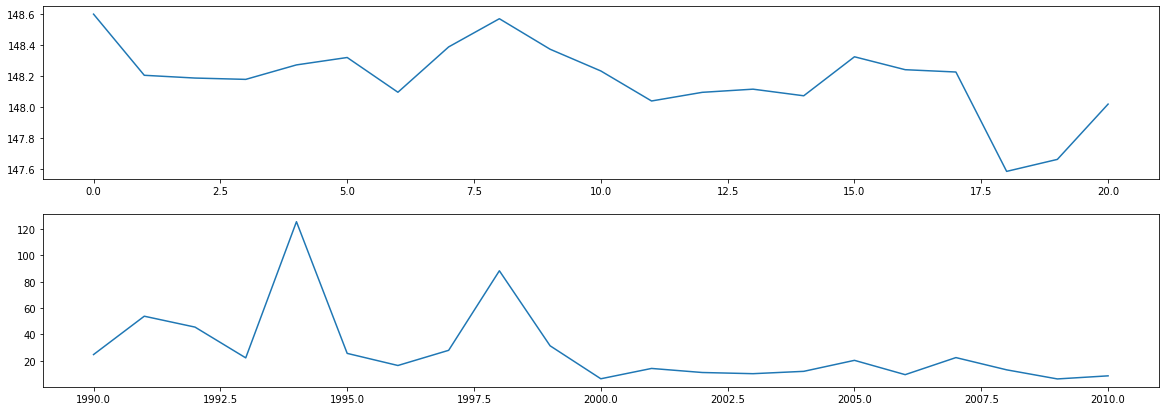

In [49]:
fig, ax = plt.subplots(2, 1, figsize=(20, 7))
ax[0].plot(reanalysis_air_temp_k_converted.values)
ax[1].plot(temperature_analysis['total_cases'])
plt.show()

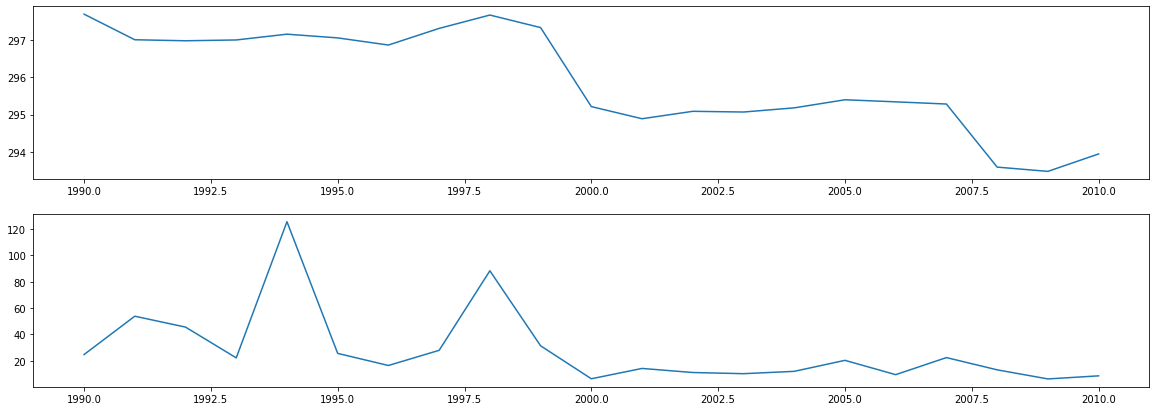

In [50]:
fig, ax = plt.subplots(2, 1, figsize=(20, 7))
ax[0].plot(temperature_analysis['reanalysis_min_air_temp_k'])
ax[1].plot(temperature_analysis['total_cases'])
plt.show()

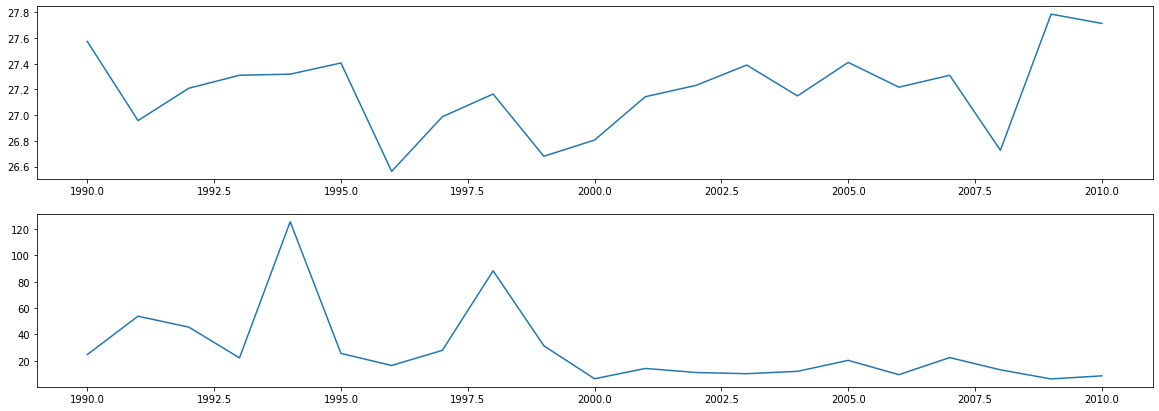

In [51]:
fig, ax = plt.subplots(2, 1, figsize=(20, 7))
ax[0].plot(temperature_analysis['station_avg_temp_c'])
ax[1].plot(temperature_analysis['total_cases'])
plt.show()

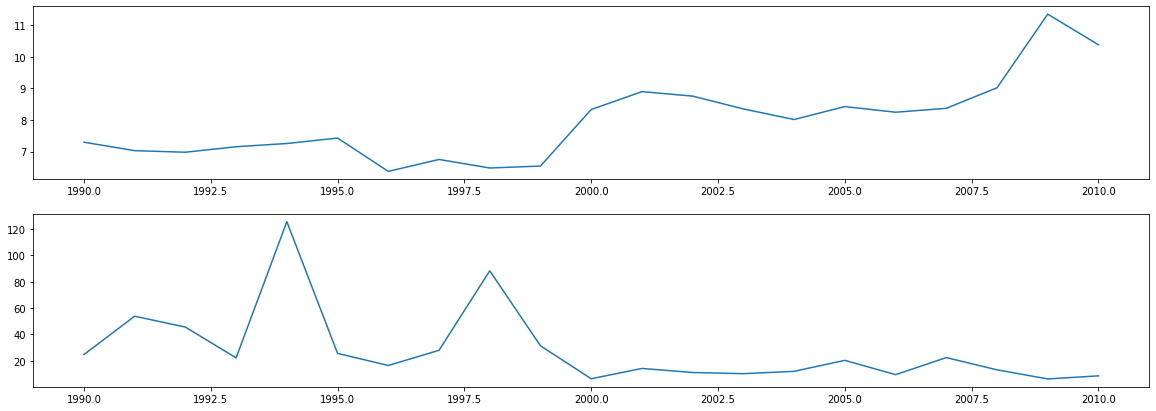

In [52]:
fig, ax = plt.subplots(2, 1, figsize=(20, 7))
ax[0].plot(temperature_analysis['station_diur_temp_rng_c'])
ax[1].plot(temperature_analysis['total_cases'])
plt.show()

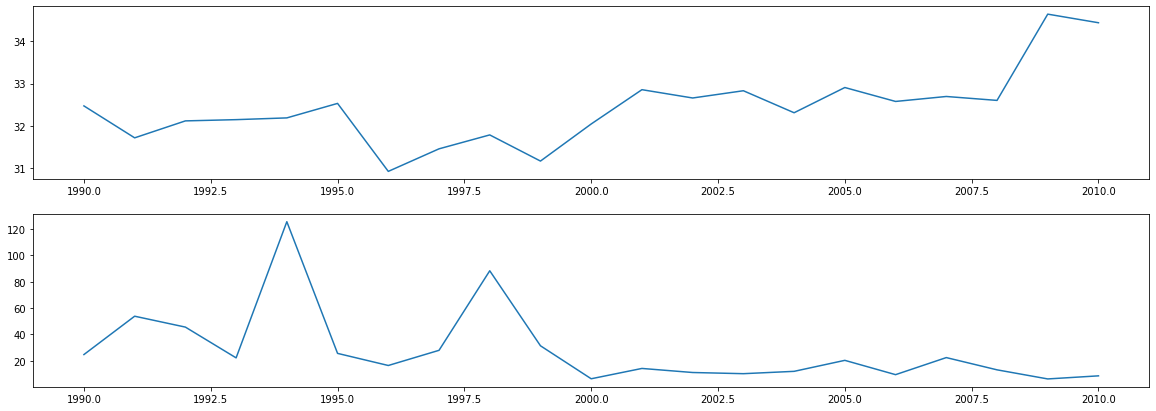

In [53]:
fig, ax = plt.subplots(2, 1, figsize=(20, 7))
ax[0].plot(temperature_analysis['station_max_temp_c'])
ax[1].plot(temperature_analysis['total_cases'])
plt.show()

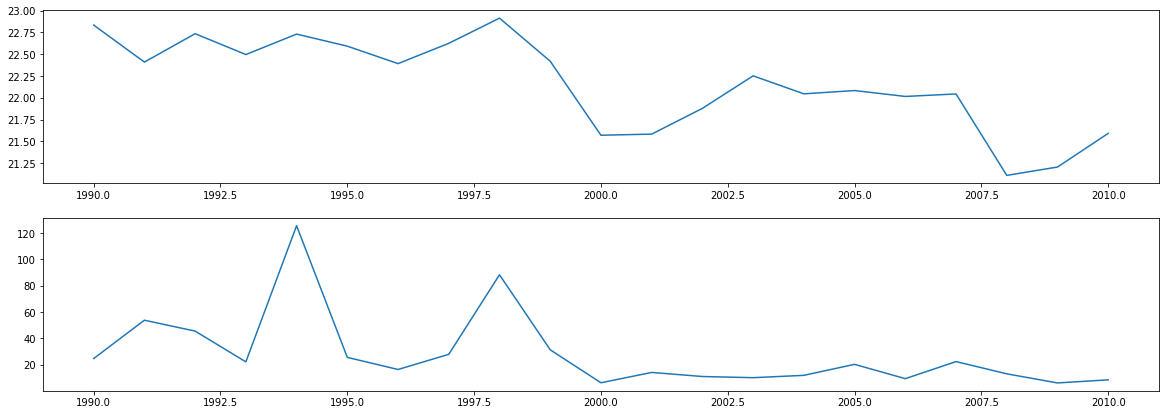

In [54]:
fig, ax = plt.subplots(2, 1, figsize=(20, 7))
ax[0].plot(temperature_analysis['station_min_temp_c'])
ax[1].plot(temperature_analysis['total_cases'])
plt.show()

In [55]:
px.scatter(temperature_analysis, x='reanalysis_air_temp_k', y='total_cases', trendline='ols')

In [56]:
merged_df

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0      sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1      sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2      sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3      sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4      sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   
...   ...   ...         ...             ...       ...       ...       ...   
1451   iq  2010          21      2010-05-28  0.342750  0.318900  0.256343   
1452   iq  2010          22      2010-06-04  0.160157  0.160371  0.136043   
1453   iq  2010          23      2010-06-11  0.247057  0.146057  0.250357   
1454   iq  2010          24      2010-06-18  0.333914  0.245771  0.278886   
1455   iq  2010          25      2010-06-25  0.298186  0.232971  0.274214   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0     0.177617                 12.42             297.572857   
1     0.155486                 22.82             298.211429   
2     0.170843                 34.54             298.781429   
3     0.235886                 15.36             298.987143   
4     0.247340                  7.52             299.518571   
...        ...                   ...                    ...   
1451  0.292514                 55.30             299.334286   
1452  0.225657                 86.47             298.330000   
1453  0.233714                 58.94             296.598571   
1454  0.325486                 59.67             296.345714   
1455  0.315757                 63.22             298.097143   

      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0                297.742857                   292.414286   
1                298.442857                   293.951429   
2                298.878571                   295.434286   
3                299.228571                   295.310000   
4                299.664286                   295.821429   
...                     ...                          ...   
1451             300.771429                   296.825714   
1452             299.392857                   296.452857   
1453             297.592857                   295.501429   
1454             297.521429                   295.324286   
1455             299.835714                   295.807143   

      reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                         299.8                      295.9   
1                         300.9                      296.4   
2                         300.5                      297.3   
3                         301.4                      297.0   
4                         301.9                      297.5   
...                         ...                        ...   
1451                      309.7                      294.5   
1452                      308.5                      291.9   
1453                      305.5                      292.4   
1454                      306.1                      291.9   
1455                      307.8                      292.3   

      reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                               32.00                             73.365714   
1                               17.94                             77.368571   
2                               26.10                             82.052857   
3                               13.90                             80.337143   
4                               12.20                             80.460000   
...                               ...                                   ...   
1451                            45.00                             88.765714   
1452                           207.10                             91.600000   
1453                            50.60                             94.280000   
1454                            62.33                             9

In [57]:
dewpoint_humidity_analysis = merged_df.groupby('week_start_date').agg(reanalysis_dew_point_temp_k=('reanalysis_dew_point_temp_k', np.mean),
                                                                     reanalysis_relative_humidity_percent=('reanalysis_relative_humidity_percent', np.mean),
                                                                     reanalysis_specific_humidity_g_per_kg=('reanalysis_specific_humidity_g_per_kg', np.mean),
                                                                     total_cases=('total_cases', np.mean))

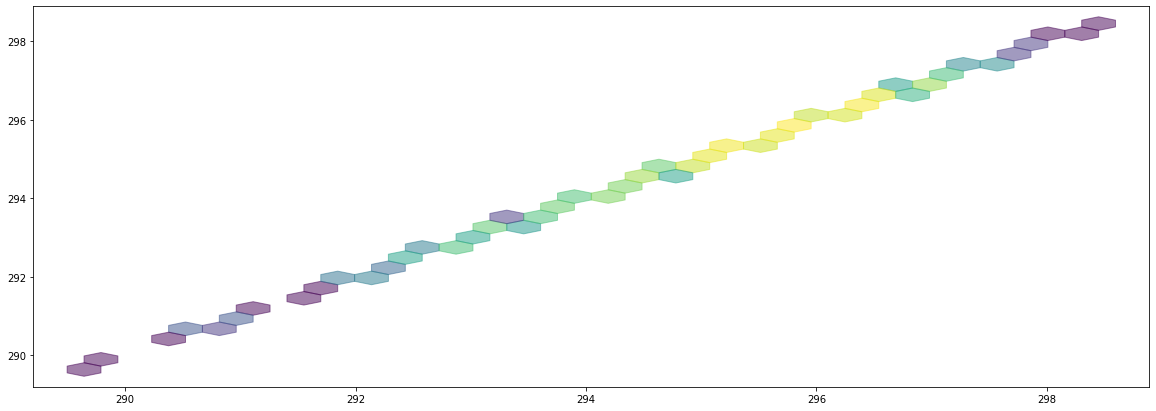

In [58]:
plt.figure(figsize=(20, 7))
plt.hexbin(x=dewpoint_humidity_analysis['reanalysis_dew_point_temp_k'],
           y=dewpoint_humidity_analysis['reanalysis_dew_point_temp_k'],
           alpha=0.5, bins='log', gridsize=30)
plt.show()

In [61]:
px.scatter(dewpoint_humidity_analysis, x='reanalysis_relative_humidity_percent', y='total_cases', trendline='ols')

In [78]:
df_sj = merged_df[merged_df['city'] == 'sj']
df_iq = merged_df[merged_df['city'] == 'iq']

In [79]:
df_sj = df_sj.fillna(method = 'ffill')
df_iq = df_iq.fillna(method = 'ffill')

In [80]:
df_sj.set_index('week_start_date', drop = True, inplace = True)
df_iq.set_index('week_start_date', drop = True, inplace = True)

In [66]:
df_sj['nvdi_mean'] = df_sj[df_sj.columns[3:7]].mean(axis = 1)
df_iq['nvdi_mean'] = df_iq[df_iq.columns[3:7]].mean(axis = 1)

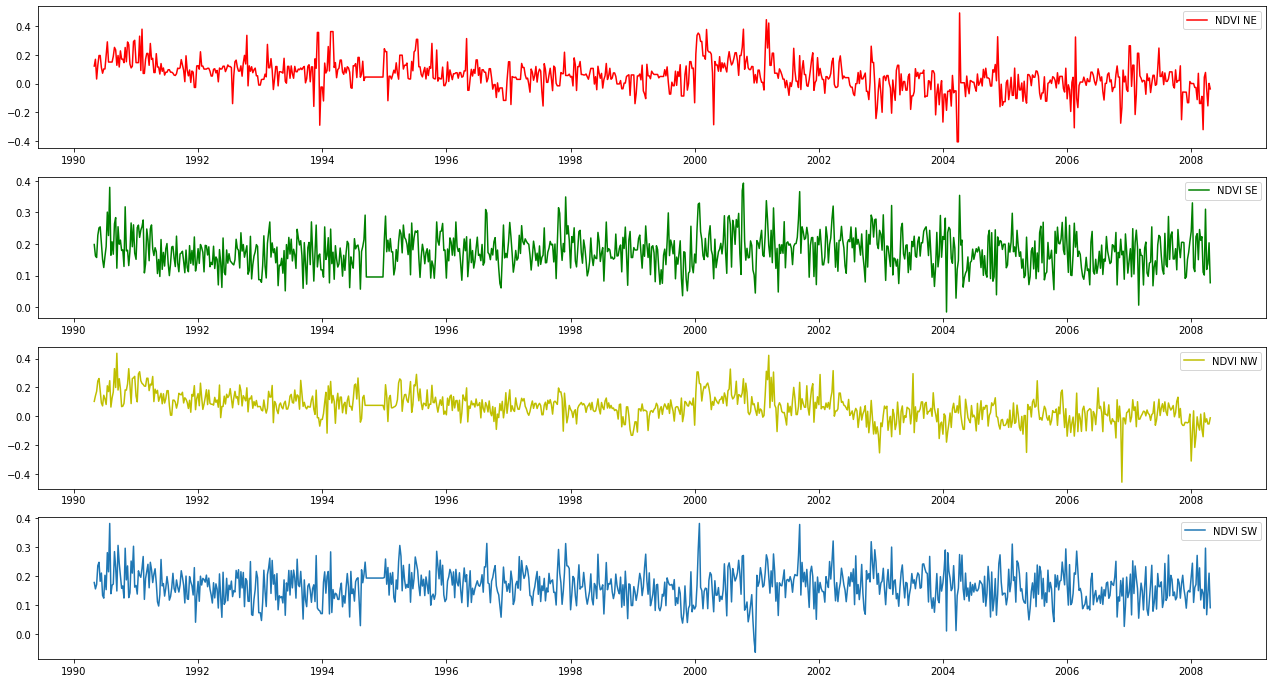

In [67]:
fig, ax = plt.subplots(4, 1, figsize=(22, 12))

ax[0].plot(df_sj['ndvi_ne'], color='r', label='NDVI NE')
ax[1].plot(df_sj['ndvi_se'], color='g', label='NDVI SE')
ax[2].plot(df_sj['ndvi_nw'], color='y', label='NDVI NW')
ax[3].plot(df_sj['ndvi_sw'], label='NDVI SW')
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

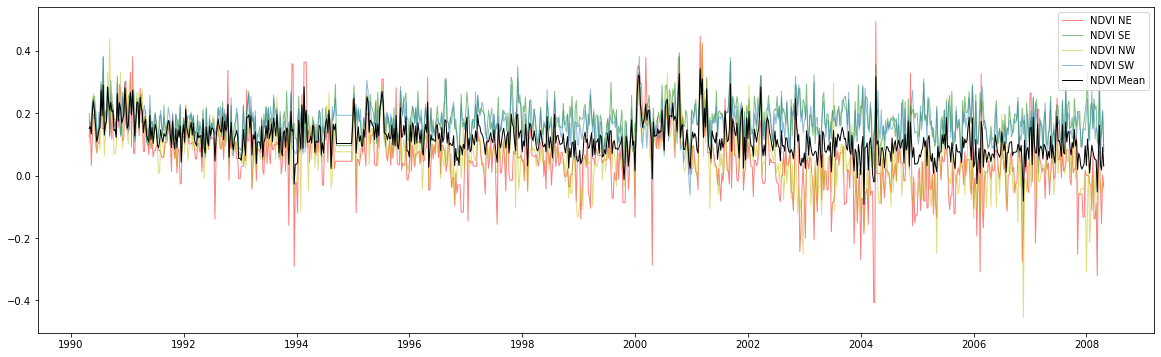

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

ax.plot(df_sj['ndvi_ne'], color='r', label='NDVI NE', alpha=0.5, linewidth=1)
ax.plot(df_sj['ndvi_se'], color='g', label='NDVI SE', alpha=0.5, linewidth=1)
ax.plot(df_sj['ndvi_nw'], color='y', label='NDVI NW', alpha=0.5, linewidth=1)
ax.plot(df_sj['ndvi_sw'], label='NDVI SW', alpha=0.5, linewidth=1)
ax.plot(df_sj['nvdi_mean'], label='NDVI Mean', color='black', alpha=1, linewidth=1)
ax.legend(loc='upper right')

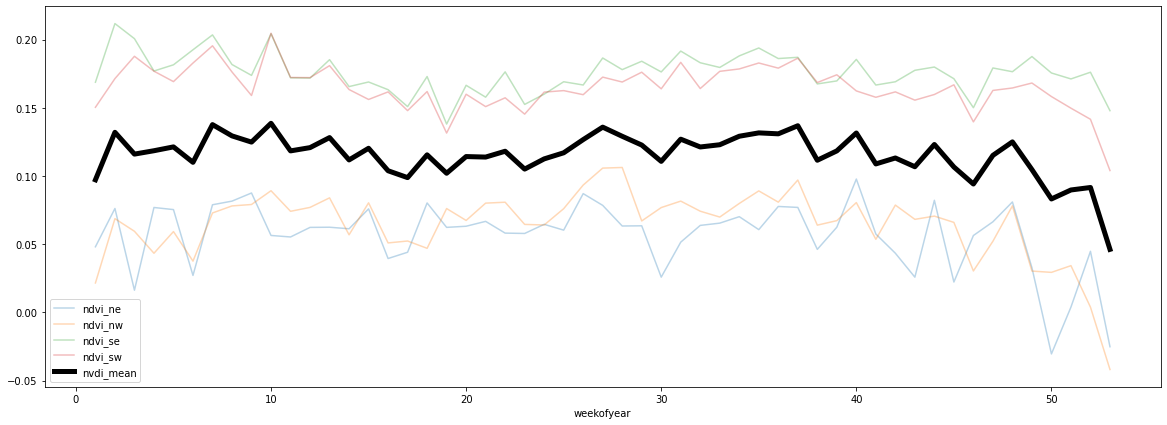

In [69]:
plt.figure(figsize=(20, 7))
for i in df_sj.columns[3:7]:
    df_sj.groupby('weekofyear')[i].mean().plot(alpha=0.3)
df_sj.groupby('weekofyear')['nvdi_mean'].mean().plot(alpha=1, c='k', linewidth=5)
plt.legend(loc='best')
plt.show()

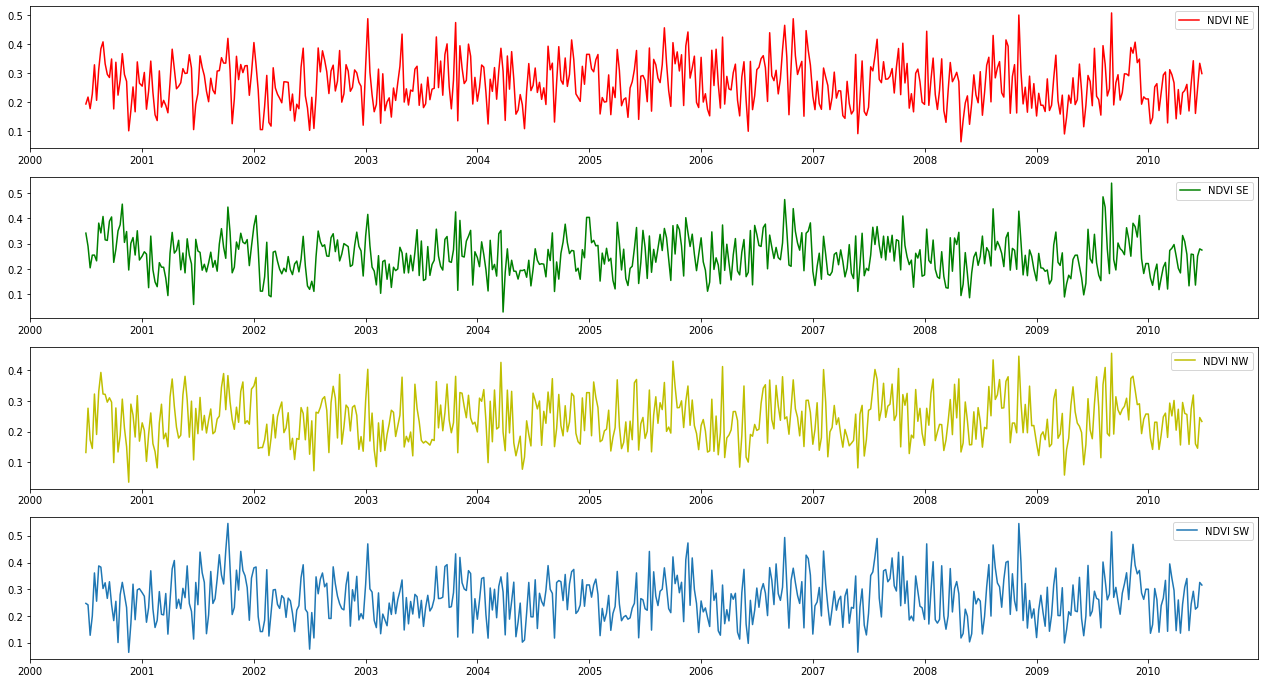

In [70]:
fig, ax = plt.subplots(4, 1, figsize=(22, 12))

ax[0].plot(df_iq['ndvi_ne'], color='r', label='NDVI NE')
ax[1].plot(df_iq['ndvi_se'], color='g', label='NDVI SE')
ax[2].plot(df_iq['ndvi_nw'], color='y', label='NDVI NW')
ax[3].plot(df_iq['ndvi_sw'], label='NDVI SW')
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

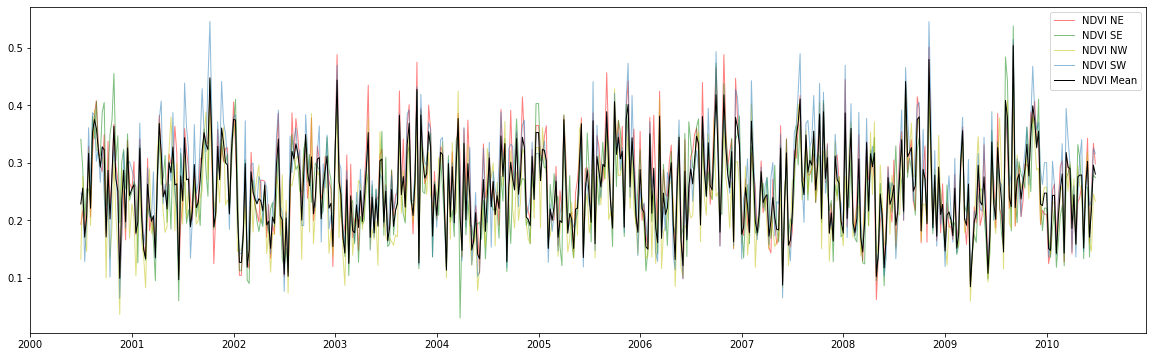

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

ax.plot(df_iq['ndvi_ne'], color='r', label='NDVI NE', alpha=0.5, linewidth=1)
ax.plot(df_iq['ndvi_se'], color='g', label='NDVI SE', alpha=0.5, linewidth=1)
ax.plot(df_iq['ndvi_nw'], color='y', label='NDVI NW', alpha=0.5, linewidth=1)
ax.plot(df_iq['ndvi_sw'], label='NDVI SW', alpha=0.5, linewidth=1)
ax.plot(df_iq['nvdi_mean'], label='NDVI Mean', color='black', alpha=1, linewidth=1)
ax.legend(loc='upper right')

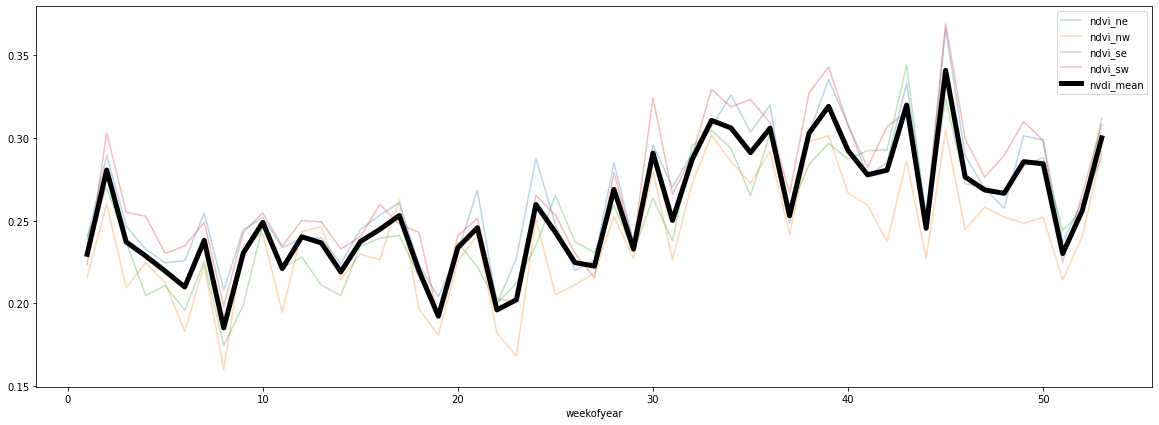

In [72]:
plt.figure(figsize=(20, 7))
for i in df_iq.columns[3:7]:
    df_iq.groupby('weekofyear')[i].mean().plot(alpha=0.3)
df_iq.groupby('weekofyear')['nvdi_mean'].mean().plot(alpha=1, c='k', linewidth=5)
plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'Number of Cases')

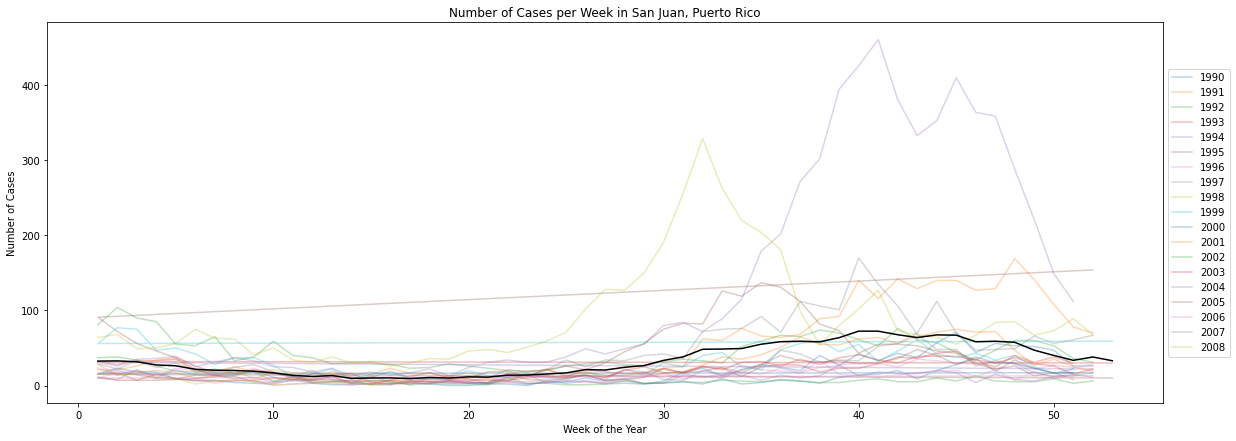

In [73]:
for i in set(df_sj['year']):
    df = df_sj[df_sj['year'] == i]
    df.set_index('weekofyear', drop = True, inplace = True)
    plt.plot(df['total_cases'], alpha = .3)
    
df_sj.groupby('weekofyear')['total_cases'].mean().plot(c = 'k', figsize = (20, 7))
plt.legend(set(df_sj['year']), loc='center left', bbox_to_anchor=(1, .5))

plt.title('Number of Cases per Week in San Juan, Puerto Rico')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')

Text(0, 0.5, 'Number of Cases')

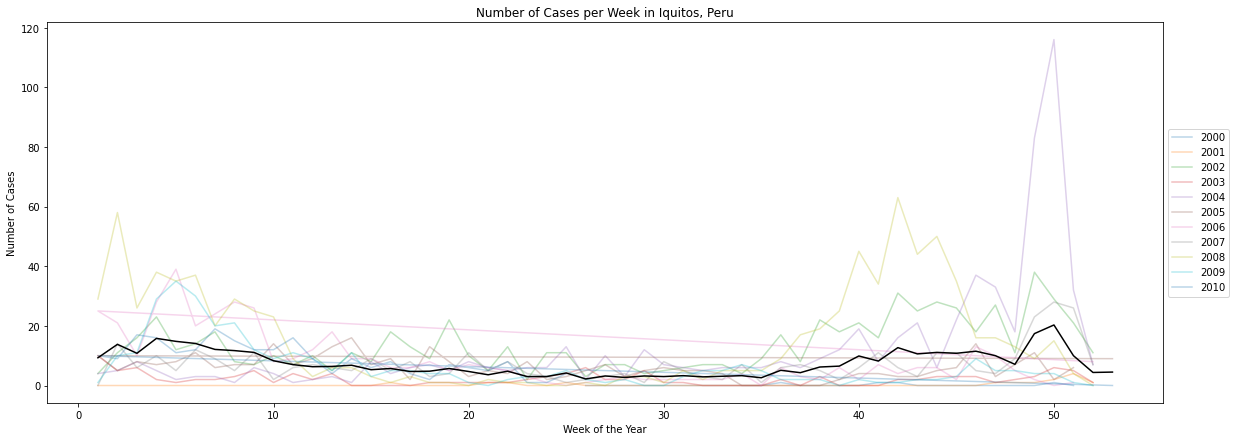

In [74]:
for i in set(df_iq['year']):
    df = df_iq[df_iq['year'] == i]
    df.set_index('weekofyear', drop = True, inplace = True)
    plt.plot(df['total_cases'], alpha = .3)

df_iq.groupby('weekofyear')['total_cases'].mean().plot(c = 'k', figsize = (20, 7))
plt.legend(set(df_iq['year']), loc='center left', bbox_to_anchor=(1, .5))

plt.title('Number of Cases per Week in Iquitos, Peru')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')

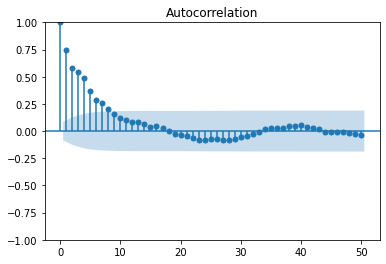

In [97]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(x=df_iq['total_cases'], lags=50);

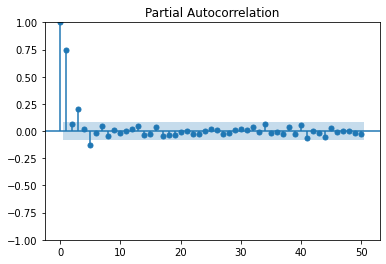

In [98]:
plot_pacf(x=df_iq['total_cases'], lags=50);

In [100]:
num_cols = [col for col in df_sj.columns if df_sj[col].dtypes in ['int64', 'float64']]
numerical_columns = df_sj[num_cols]

In [101]:
numerical_columns

year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
week_start_date                                                             
1990-04-30       1990          18  0.122600  0.103725  0.198483  0.177617   
1990-05-07       1990          19  0.169900  0.142175  0.162357  0.155486   
1990-05-14       1990          20  0.032250  0.172967  0.157200  0.170843   
1990-05-21       1990          21  0.128633  0.245067  0.227557  0.235886   
1990-05-28       1990          22  0.196200  0.262200  0.251200  0.247340   
...               ...         ...       ...       ...       ...       ...   
2008-03-25       2008          13  0.077850 -0.039900  0.310471  0.296243   
2008-04-01       2008          14 -0.038000 -0.016833  0.119371  0.066386   
2008-04-08       2008          15 -0.155200 -0.052750  0.137757  0.141214   
2008-04-15       2008          16  0.001800 -0.052750  0.203900  0.209843   
2008-04-22       2008          17 -0.037000 -0.010367  0.077314  0.090586   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
week_start_date                                                
1990-04-30                      12.42             297.572857   
1990-05-07                      22.82             298.211429   
1990-05-14                      34.54             298.781429   
1990-05-21                      15.36             298.987143   
1990-05-28                       7.52             299.518571   
...                               ...                    ...   
2008-03-25                      27.19             296.958571   
2008-04-01                       3.82             298.081429   
2008-04-08                      16.96             297.460000   
2008-04-15                       0.00             297.630000   
2008-04-22                       0.00             298.672857   

                 reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
week_start_date                                                       
1990-04-30                  297.742857                   292.414286   
1990-05-07                  298.442857                   293.951429   
1990-05-14                  298.878571                   295.434286   
1990-05-21                  299.228571                   295.310000   
1990-05-28                  299.664286                   295.821429   
...                                ...                          ...   
2008-03-25                  296.957143                   292.095714   
2008-04-01                  298.228571                   293.235714   
2008-04-08                  297.564286                   292.732857   
2008-04-15                  297.778571                   292.274286   
2008-04-22                  298.692857                   294.280000   

                 reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
week_start_date                                                         
1990-04-30                           299.8                      295.9   
1990-05-07                           300.9                      296.4   
1990-05-14                           300.5                      297.3   
1990-05-21                           301.4                      297.0   
1990-05-28                           301.9                      297.5   
...                                    ...                        ...   
2008-03-25                           299.7                      294.4   
2008-04-01                           299.8                      296.5   
2008-04-08                           299.4                      295.8   
2008-04-15                           299.7                      295.9   
2008-04-22                           300.9                      295.9   

                 reanalysis_precip_amt_kg_per_m2  \
week_start_date                                    
1990-04-30                                 32.00   
1990-05-07                                 17.94   
1990-05-14                                 26.10   
1990-05-21                                 13.90

In [106]:
df_sj.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 936 entries, 1990-04-30 to 2008-04-22
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   936 non-null    int64  
 1   year                                   936 non-null    int64  
 2   weekofyear                             936 non-null    int64  
 3   ndvi_ne                                936 non-null    float64
 4   ndvi_nw                                936 non-null    float64
 5   ndvi_se                                936 non-null    float64
 6   ndvi_sw                                936 non-null    float64
 7   precipitation_amt_mm                   936 non-null    float64
 8   reanalysis_air_temp_k                  936 non-null    float64
 9   reanalysis_avg_temp_k                  936 non-null    float64
 10  reanalysis_dew_point_temp_k            936 non-null    

In [109]:
df_sj['city'] = df_sj['city'].astype('float64')
df_sj['year'] = df_sj['year'].astype('float64')
df_sj['total_cases'] = df_sj['total_cases'].astype('float64')
df_sj['weekofyear'] = df_sj['weekofyear'].astype('float64')

In [105]:
df_sj['city'].value_counts()

1    936
Name: city, dtype: int64

In [104]:
df_sj['city'] = df_sj['city'].map({'sj': 1})

In [174]:
df_sj_copy.index.min()

Period('1990-05-07/1990-05-13', 'W-SUN')

In [161]:
df_sj_copy.index.max()

Period('2008-04-21/2008-04-27', 'W-SUN')

In [180]:
df_sj_copy[df_sj_copy.index == '2005'].index

PeriodIndex(['2004-12-27/2005-01-02'], dtype='period[W-SUN]', name='week_start_date')

In [111]:
df_sj.index = pd.DatetimeIndex(df_sj.index).to_period('W')

In [117]:
variance = df_sj.var()
variance

city                                        0.000000
year                                       27.165734
weekofyear                                225.657744
ndvi_ne                                     0.011005
ndvi_nw                                     0.008366
ndvi_se                                     0.003316
ndvi_sw                                     0.003116
precipitation_amt_mm                     1994.090491
reanalysis_air_temp_k                       1.530904
reanalysis_avg_temp_k                       1.487908
reanalysis_dew_point_temp_k                 2.465136
reanalysis_max_air_temp_k                   1.586263
reanalysis_min_air_temp_k                   1.677471
reanalysis_precip_amt_kg_per_m2          1262.549710
reanalysis_relative_humidity_percent       11.456699
reanalysis_sat_precip_amt_mm             1994.090491
reanalysis_specific_humidity_g_per_kg       2.435668
reanalysis_tdtr_k                           0.248186
station_avg_temp_c                          2.

In [119]:
variance[variance<1]

city                       0.000000
ndvi_ne                    0.011005
ndvi_nw                    0.008366
ndvi_se                    0.003316
ndvi_sw                    0.003116
reanalysis_tdtr_k          0.248186
station_diur_temp_rng_c    0.697312
dtype: float64